# Imports

In [2]:
import pandas as pd
from bicon import *
import gseapy

# Breast cancer

## 1. Data

## 1.1 Viewing the data
### 1.1.1 Gene expression

In [3]:
expr = pd.read_csv("data/breast_cancer/expression.csv",index_col = 0)
expr.head()

,TCGA-E9-A1RD-01,TCGA-EW-A1P5-01,TCGA-A7-A56D-01,TCGA-AR-A251-01,TCGA-AC-A4ZE-01,TCGA-E9-A1QZ-01,TCGA-AC-A2QI-01,TCGA-GM-A2DL-01,TCGA-AR-A1AK-01,TCGA-BH-A18S-01,...,TCGA-E2-A150-01,TCGA-LL-A8F5-01,TCGA-AC-A62V-01,TCGA-A2-A04T-01,TCGA-A2-A25D-01,TCGA-D8-A1Y0-01,TCGA-A8-A07O-01,TCGA-BH-A5IZ-01,TCGA-S3-AA0Z-01,TCGA-D8-A143-01
399473,0.2522,-0.4521,-0.6873,0.5666,0.4657,-0.5543,0.8961,-0.4131,0.4552,-0.5973,...,-1.1811,-1.0559,-1.2481,-2.1779,-1.5951,0.5763,-0.9686,-0.8339,0.8647,1.6093
6697,6.4631,7.0066,4.9951,5.1930,6.9735,6.0299,5.9603,4.3046,5.7640,6.1310,...,4.4101,4.7005,6.5850,4.9561,5.9267,5.6511,5.6885,4.9598,2.8055,4.6451
161725,-0.4921,0.0440,-4.2934,-1.8836,-0.4131,-0.7834,-1.3183,-2.3884,1.1641,-0.1031,...,-4.6082,-3.3076,-4.6082,-1.4699,-2.2447,-1.9379,-4.6082,1.0847,0.3115,-1.2481
2776,4.7629,3.8167,2.7889,5.2784,4.6479,3.7730,4.5988,4.1915,4.5589,4.4726,...,4.4013,2.2144,2.5658,3.6543,3.9543,5.0558,3.2826,4.5534,4.8515,3.6113
9033,-0.1993,-0.0277,-0.5332,-4.0350,-5.5735,-1.2481,-0.8084,-5.5735,0.6425,0.1257,...,-4.6082,0.3907,1.4600,-2.7274,-1.0262,-4.2934,-3.6259,-1.9942,-1.1172,-2.1140


### 1.1.2 PPI

In [4]:
ppi = pd.read_csv("data/biogrid.human.entrez.tsv", sep = "\t", header = None)
ppi.head()

,0,1
0,6416,2318
1,6416,5371
2,6416,351
3,6416,409
4,6416,5932


# 1.2 Preprocessing:
### BiCoN preprocessing module by default takes care of data normalization, log2 transformation and reduction to the most variable genes

In [5]:
path_expr,path_net ='data/breast_cancer/expression.csv', 'data/biogrid.human.entrez.tsv'
GE,G,labels, _= data_preprocessing(path_expr, path_net)


### If your data is already zscored set zscores=False.
### If you don't need log2 transformation set log2=False.


## 2. Running the algorithm

### 2.1 Setting solution minimal and maximal size

In [6]:
L_g_min = 10
L_g_max = 15

### 2.2 Running the search (takes 2-3 minutes)

In [7]:
model = BiCoN(GE,G,L_g_min,L_g_max)
solution,scores= model.run_search(max_iter = 50, verbose = False)

100%|██████████| 20/20 [00:02<00:00,  8.77it/s]


## 3. Results analysis

### 3.1 Creating the object for results analysis

In [8]:
results = results_analysis(solution, labels, convert = True, origID = 'entrezgene')
# convert = True - to convert to gene names
# origID = 'entrezgene' - the original gene id

### 3.2 Network visualization

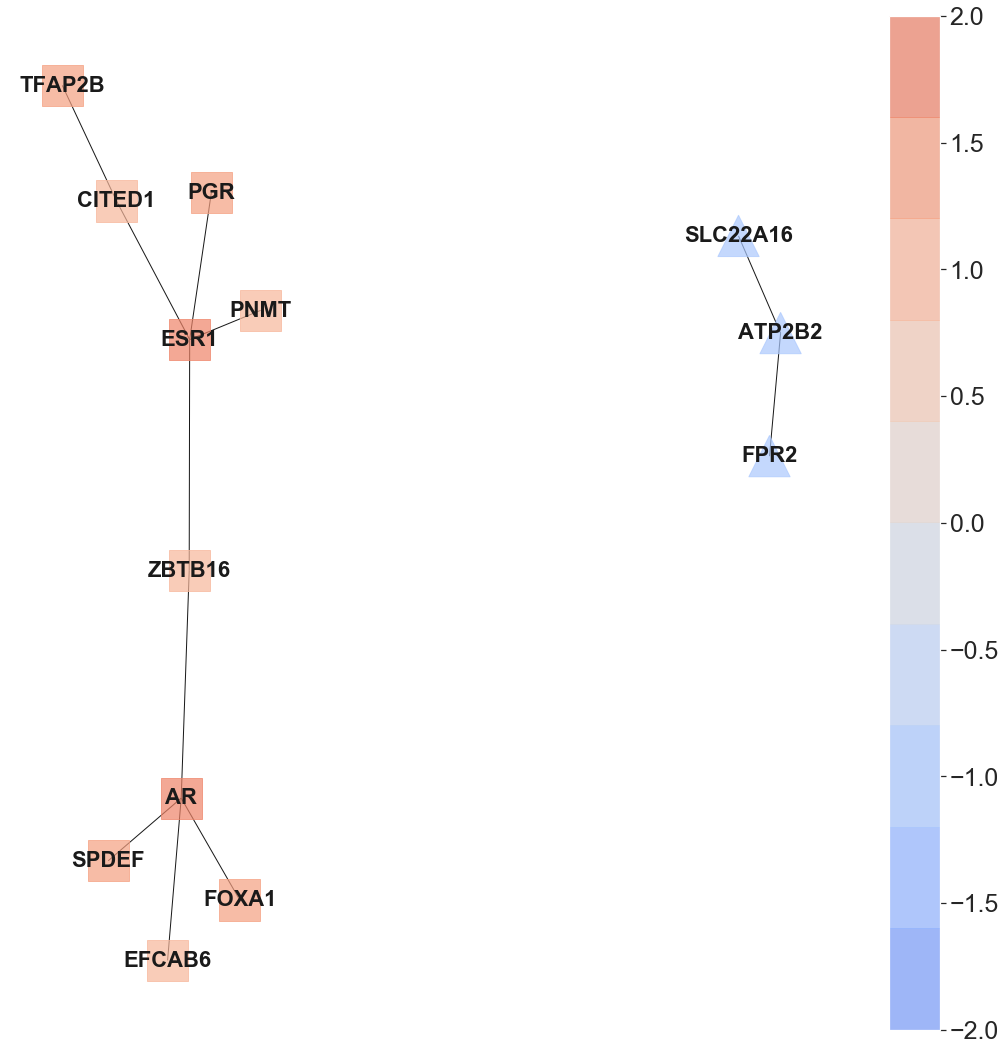

In [9]:
results.show_networks(GE, G)


### 3.2 Biclustering visualization

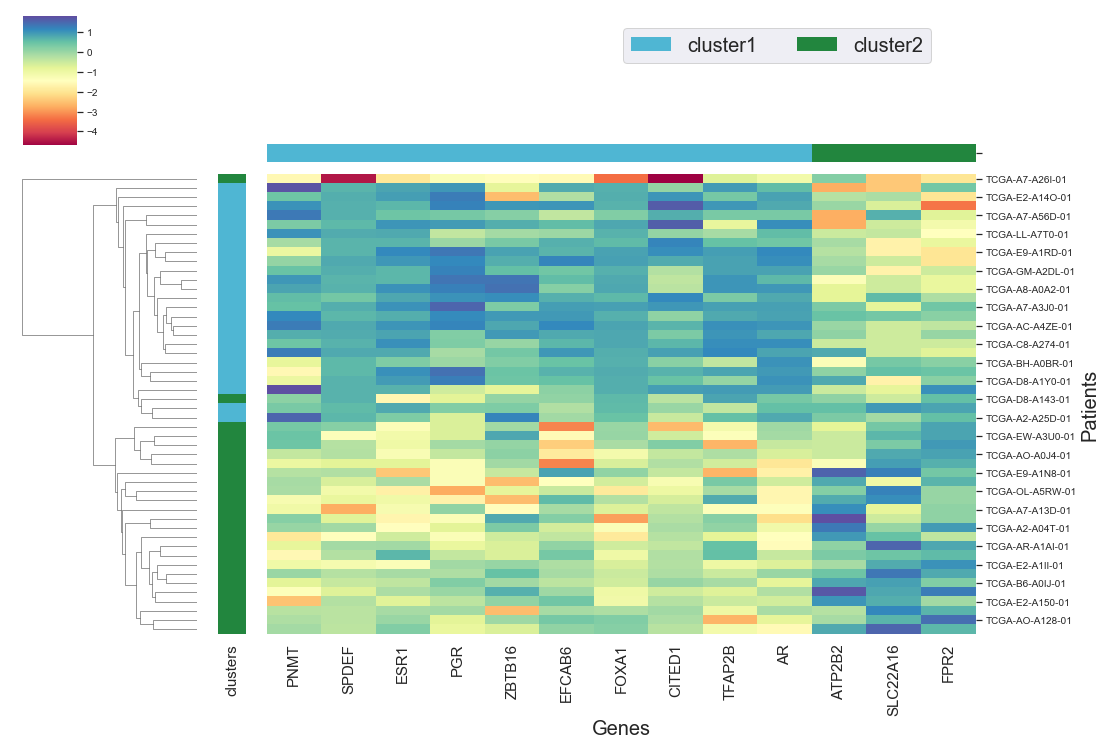

In [10]:
results.show_clustermap(GE, G)

### To access patients/genes biclusters run:
```{python}
print(results.patients1)
print(results.patients1)
print(results.genes1)
print(results.genes2)
```
#### Example: print patients IDs in the first bicluster:

In [11]:
print(results.patients1)

['TCGA-E9-A1RD-01', 'TCGA-EW-A1P5-01', 'TCGA-A7-A56D-01', 'TCGA-AC-A4ZE-01', 'TCGA-E9-A1QZ-01', 'TCGA-AC-A2QI-01', 'TCGA-GM-A2DL-01', 'TCGA-AR-A1AK-01', 'TCGA-BH-A18S-01', 'TCGA-AR-A24X-01', 'TCGA-D8-A1Y2-01', 'TCGA-A7-A426-01', 'TCGA-C8-A274-01', 'TCGA-A8-A0A2-01', 'TCGA-LL-A7T0-01', 'TCGA-AO-A0J7-01', 'TCGA-AC-A3EH-01', 'TCGA-BH-A18U-01', 'TCGA-A8-A09I-01', 'TCGA-E2-A14O-01', 'TCGA-A7-A3J0-01', 'TCGA-BH-A0BR-01', 'TCGA-AC-A62V-01', 'TCGA-A2-A25D-01', 'TCGA-D8-A1Y0-01']


### 3.3 Quality control with the ground truth
#### load IDs of patients that have Huntington and Controls

In [12]:
lum_ids = pd.read_csv("data/breast_cancer/luminal.txt", sep = "\t", header = None)[0].tolist()
lum_ids

['TCGA-A8-A09I-01',
 'TCGA-A2-A25D-01',
 'TCGA-AR-A24X-01',
 'TCGA-E9-A1QZ-01',
 'TCGA-D8-A1Y0-01',
 'TCGA-A7-A426-01',
 'TCGA-GM-A2DL-01',
 'TCGA-BH-A18S-01',
 'TCGA-AR-A1AK-01',
 'TCGA-A7-A3J0-01',
 'TCGA-BH-A0BR-01',
 'TCGA-AC-A62V-01',
 'TCGA-AC-A3EH-01',
 'TCGA-A7-A56D-01',
 'TCGA-D8-A1Y2-01',
 'TCGA-C8-A274-01',
 'TCGA-EW-A1P5-01',
 'TCGA-E9-A1RD-01',
 'TCGA-A8-A0A2-01',
 'TCGA-BH-A18U-01',
 'TCGA-E2-A14O-01',
 'TCGA-AC-A2QI-01',
 'TCGA-AC-A4ZE-01',
 'TCGA-LL-A7T0-01',
 'TCGA-AO-A0J7-01']

In [13]:
basal_ids = pd.read_csv("data/breast_cancer/basal.txt", sep = "\t", header = None)[0].tolist()
basal_ids

['TCGA-S3-AA0Z-01',
 'TCGA-LL-A8F5-01',
 'TCGA-AR-A251-01',
 'TCGA-E2-A1II-01',
 'TCGA-B6-A0IJ-01',
 'TCGA-A8-A07O-01',
 'TCGA-AO-A128-01',
 'TCGA-PL-A8LZ-01',
 'TCGA-A2-A3Y0-01',
 'TCGA-OL-A5D7-01',
 'TCGA-AO-A0J4-01',
 'TCGA-A8-A07C-01',
 'TCGA-EW-A3U0-01',
 'TCGA-AR-A1AI-01',
 'TCGA-BH-A5IZ-01',
 'TCGA-A2-A04T-01',
 'TCGA-A7-A13D-01',
 'TCGA-AR-A1AJ-01',
 'TCGA-E2-A150-01',
 'TCGA-OL-A5RW-01',
 'TCGA-D8-A143-01',
 'TCGA-HN-A2NL-01',
 'TCGA-A7-A26I-01',
 'TCGA-E9-A1N8-01',
 'TCGA-A7-A5ZV-01']

### 3.4 Clustermap with known labels

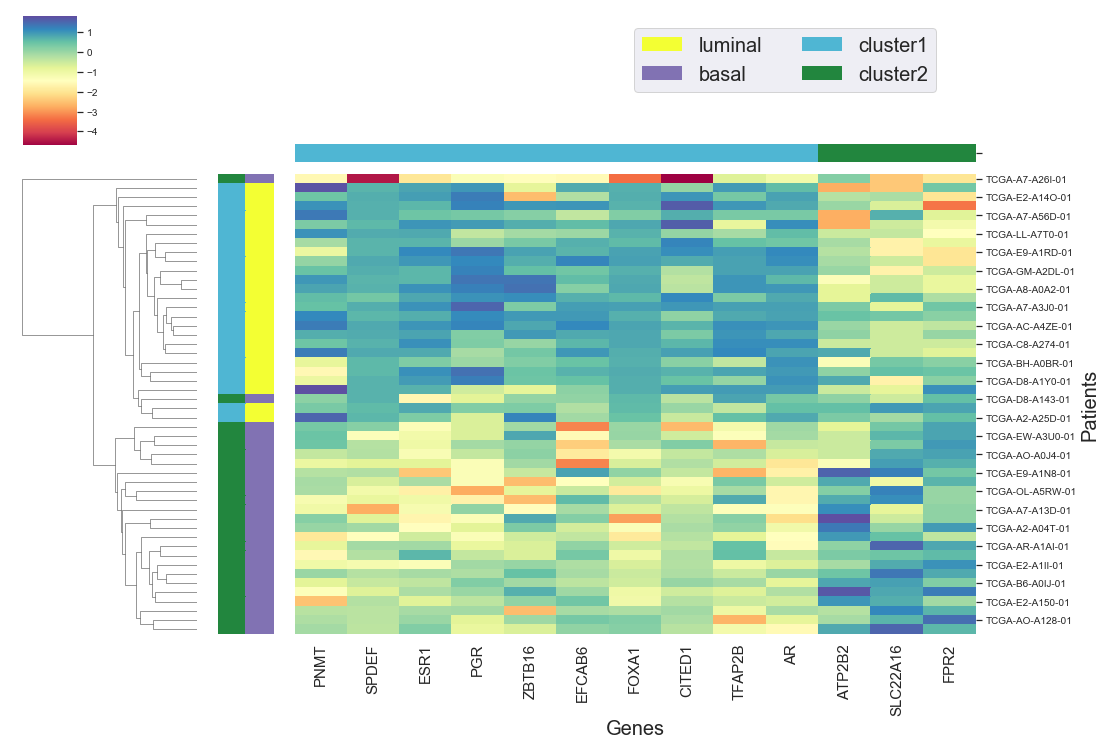

In [14]:
true_classes = [lum_ids,basal_ids]
results.show_clustermap(GE, G, true_labels = true_classes,class_names = ["luminal", "basal"])


### 3.4 Evaluate overlap between the real patient phenotype and the clusters


In [15]:
results.jaccard_index(true_labels = true_classes)


Jaccard indices for two groups are 1.0 and 1.0


(1.0, 1.0)

### 3.5 Enrichment analysis with gseapy
#### 3.5.6 Check all available libraries 

In [16]:
gseapy.get_library_name()


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [17]:
results.enrichment_analysis(library = 'GO_Biological_Process_2021', output = None)


,Adjusted P-value,Combined Score,Gene_set,Genes,Odds Ratio,Old Adjusted P-value,Old P-value,Overlap,P-value,Term
0,0.000028,8063.353377,GO_Biological_Process_2021,AR;PGR;ESR1,499.375000,0,0,3/15,9.716159e-08,steroid hormone mediated signaling pathway (GO...
1,0.000198,2523.346918,GO_Biological_Process_2021,AR;CITED1;ESR1,187.078125,0,0,3/35,1.387234e-06,response to estrogen (GO:0043627)
2,0.000223,1866.175687,GO_Biological_Process_2021,AR;PGR;ESR1,145.946341,0,0,3/44,2.797667e-06,intracellular steroid hormone receptor signali...
3,0.000223,236.615086,GO_Biological_Process_2021,FOXA1;TFAP2B;AR;CITED1;ZBTB16;PGR;ESR1,18.661706,0,0,7/1183,3.115324e-06,"positive regulation of transcription, DNA-temp..."
4,0.000474,206.693792,GO_Biological_Process_2021,FOXA1;TFAP2B;AR;CITED1;PGR;ESR1,18.135889,0,0,6/908,1.122970e-05,positive regulation of transcription by RNA po...
...,...,...,...,...,...,...,...,...,...,...
281,0.275202,4.417296,GO_Biological_Process_2021,FPR2,3.386632,0,0,1/481,2.713534e-01,neutrophil degranulation (GO:0043312)
282,0.276190,4.355977,GO_Biological_Process_2021,FPR2,3.357955,0,0,1/485,2.732928e-01,neutrophil activation involved in immune respo...
283,0.276679,4.310804,GO_Biological_Process_2021,FPR2,3.336756,0,0,1/488,2.747442e-01,neutrophil mediated immunity (GO:0002446)
284,0.303345,3.556602,GO_Biological_Process_2021,ESR1,2.972783,0,0,1/546,3.022840e-01,positive regulation of intracellular signal tr...
